In [32]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
movie_df = pd.read_csv ("bollywood.csv")

In [3]:
movie_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
Genre_list = movie_df['Genre'].tolist()
print (Genre_list)

['Romance', 'Thriller', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Action', 'Romance', 'Romance', 'Action', 'Comedy', 'Action', 'Thriller', 'Comedy', 'Comedy', 'Comedy', 'Thriller', 'Action', 'Action', 'Drama', 'Romance', 'Drama', 'Drama', 'Drama', 'Thriller', 'Drama', 'Thriller', 'Thriller', 'Romance', 'Drama', 'Drama', 'Action', 'Action', 'Romance', 'Thriller', 'Comedy', 'Drama', 'Action', 'Romance', 'Action', 'Thriller', 'Romance', 'Comedy', 'Comedy', 'Action', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Thriller', 'Action', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Thriller', 'Drama', 'Romance', 'Comedy', 'Romance', 'Romance', 'Thriller', 'Drama', 'Drama', 'Thriller', 'Comedy', 'Thriller', 'Drama', 'Comedy', 'Drama', 'Action', 'Action', 'Comedy', 'Romance', 'Drama', 'Romance', 'Romance', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Thriller', 'Drama', 'Romance', 'Action', 'Action', 'Thriller', 'Thriller', 'Comedy', 'Comedy', 'R

In [5]:
movie_df.Genre.unique()

array(['Romance', 'Thriller', 'Comedy', 'Drama', 'Action'], dtype=object)

In [6]:
movie_df.count()

SlNo                   149
Release Date           149
MovieName              149
ReleaseTime            149
Genre                  149
Budget                 149
BoxOfficeCollection    149
YoutubeViews           149
YoutubeLikes           149
YoutubeDislikes        149
dtype: int64

In [7]:
movie_df.ReleaseTime.unique()

array(['LW', 'N', 'HS', 'FS'], dtype=object)

In [8]:
movie_df.MovieName.count()

149

In [9]:
genre =  movie_df['Genre'].head(149)
movie_name = movie_df['MovieName'].head(149)
release_date = movie_df['Release Date'].head(149)
release_time = movie_df['ReleaseTime'].head(149)
budget = movie_df['Budget'].head(149)
bo_collection = movie_df['BoxOfficeCollection'].head(149)
yt_views = movie_df['YoutubeViews'].head(149)
yt_likes = movie_df['YoutubeLikes'].head(149)
yt_dislikes = movie_df['YoutubeDislikes'].head(149)
release_time.head(9)

0    LW
1     N
2     N
3     N
4     N
5    HS
6     N
7     N
8    LW
Name: ReleaseTime, dtype: object

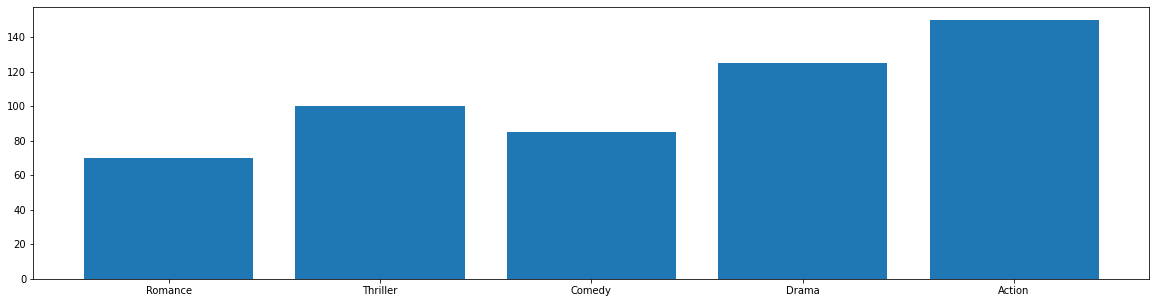

In [10]:
fig = plt.figure(figsize = (20,5))
plt.bar (genre, budget)
plt.show()

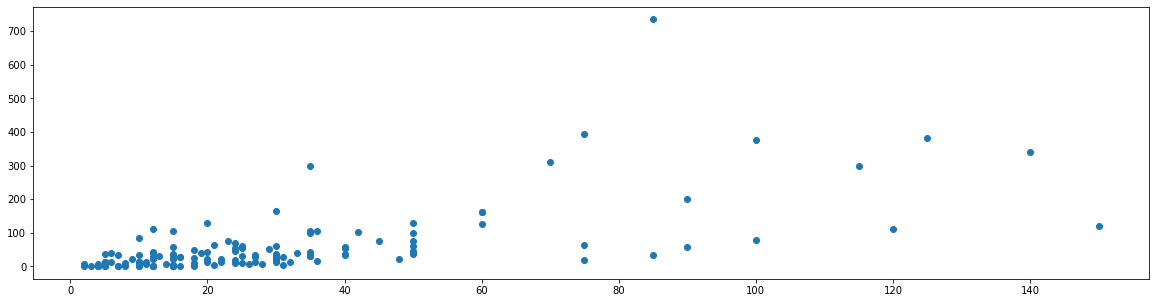

In [11]:
fig = plt.figure(figsize = (20,5))
plt.scatter(budget,bo_collection)
plt.show()

<AxesSubplot:xlabel='Budget', ylabel='BoxOfficeCollection'>

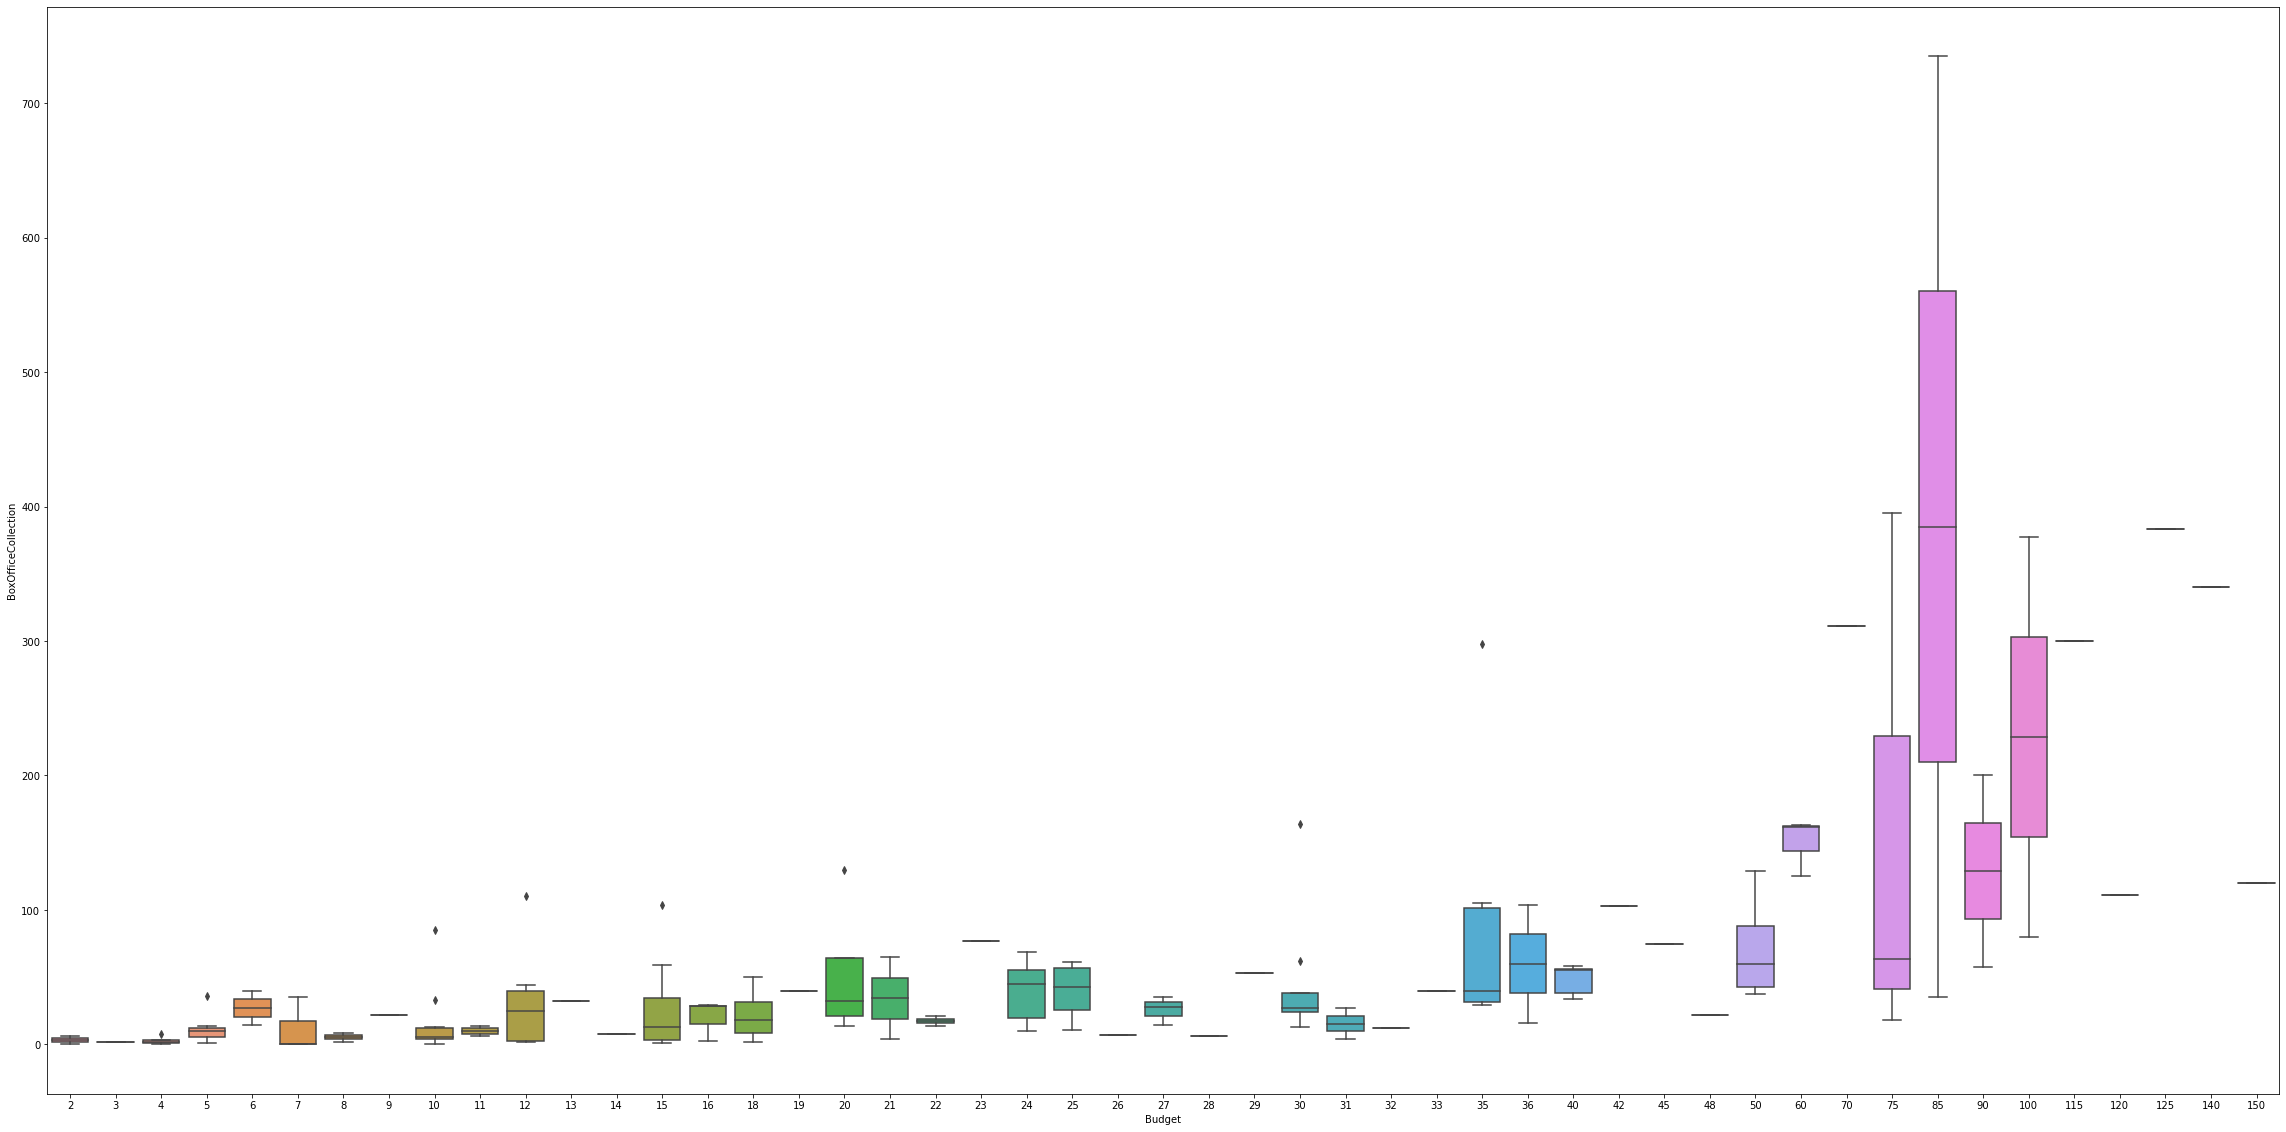

In [12]:
#box_data = [genre, movie_name, release_date, release_time, budget, bo_collection, yt_views, yt_likes, yt_dislikes]
fig = plt.figure(figsize = (40,20))
sn.boxplot (data=movie_df, x= "Budget", y="BoxOfficeCollection")

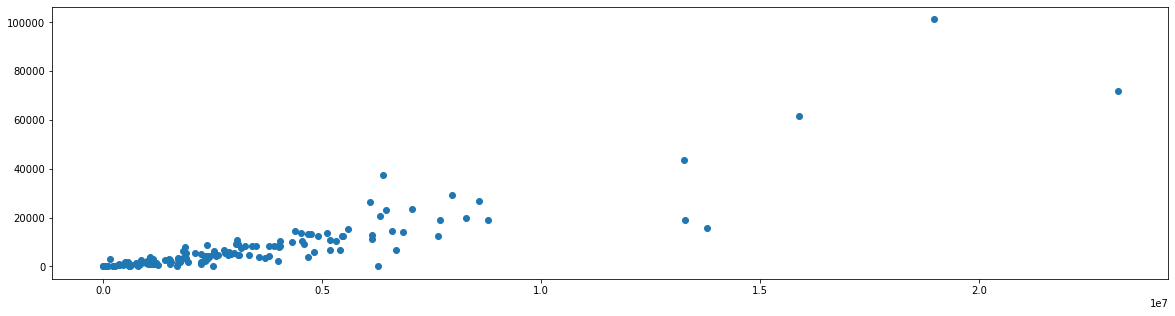

In [13]:
fig = plt.figure(figsize = (20,5))
plt.scatter(yt_views,yt_likes)
plt.show()

In [14]:
movie_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [19]:
scaler = StandardScaler()
scaled_movie_df = scaler.fit_transform(movie_df[["Budget", "BoxOfficeCollection", "YoutubeViews", "YoutubeLikes", "YoutubeDislikes"]])
scaled_movie_df [0:5]

array([[ 0.23298981,  0.51321238,  1.49985682,  1.47533831,  0.71443593],
       [-0.6908613 , -0.46367259, -0.64438591, -0.53116352, -0.57992898],
       [-0.6908613 , -0.54861911, -0.79183479, -0.57390194, -0.62487973],
       [-0.79745951, -0.58737596, -0.94349998, -0.61325592, -0.64383487],
       [-0.40659942, -0.47641457, -0.06427623, -0.26489452,  0.00876334]])

In [18]:
from sklearn.cluster import KMeans

In [26]:
first_cluster = KMeans(3, random_state=42)
first_cluster.fit(scaled_movie_df)
movie_df["cluster_id"] = first_cluster.labels_
movie_df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,cluster_id
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,2
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,0
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,0
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,0
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,0
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84,0
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373,0
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647,0
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591,0
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1,0


In [31]:
#"Release Date","MovieName","ReleaseTime","Genre","Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"

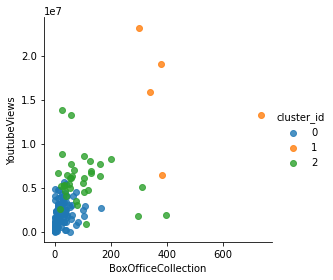

In [43]:
sn.lmplot("BoxOfficeCollection","YoutubeViews",data = movie_df, hue = "cluster_id", fit_reg = False, size = 4)

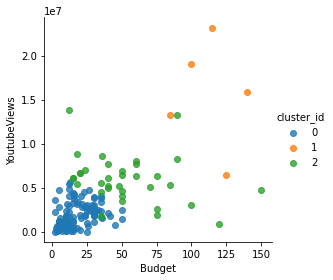

In [46]:
sn.lmplot("Budget","YoutubeViews",data = movie_df, hue = "cluster_id", fit_reg = False, size = 4)

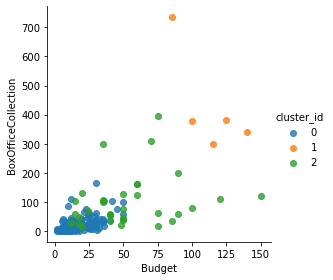

In [47]:
sn.lmplot("Budget","BoxOfficeCollection",data = movie_df, hue = "cluster_id", fit_reg = False, size = 4)

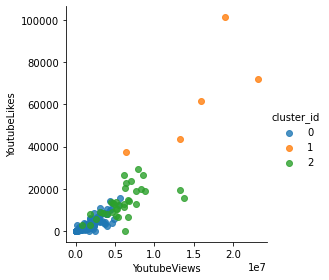

In [48]:
sn.lmplot("YoutubeViews", "YoutubeLikes",data = movie_df, hue = "cluster_id", fit_reg = False, size = 4)